# Are Netflix movies decreasing in length over time?




A friend told me that he has noticed that the length of Netflix movies are getting shorter over time. He sent me a list of observations that contains lenght averages over the years. We'll use to it start our analysis. 

<p><img src="https://assets.datacamp.com/production/project_1237/img/netflix.jpg" alt="Someone's feet on table facing a television"></p>


As evidence of this, he have provided us with the following information. For the years from 2011 to 2020, the average movie durations are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90, respectively.

##### Creating lists, a dictionary and a DataFrame using the data and Pandas

In [24]:
# Create the years and durations lists
years = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict = {'years':years, 'durations':durations}

import pandas as pd

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
durations_df

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


##### Viewing the data

<p>Now the we have a <code>pandas</code> DataFrame, a great place to start will be a visualization of the data.</p>
<p>Given that the data is continuous, a line plot would be a good choice, with the dates represented along the x-axis and the average length in minutes along the y-axis. This will allow us to easily spot any trends in movie durations. There are many ways to visualize data in Python, but <code>matploblib.pyplot</code> is one of the most common packages to do so.</p>

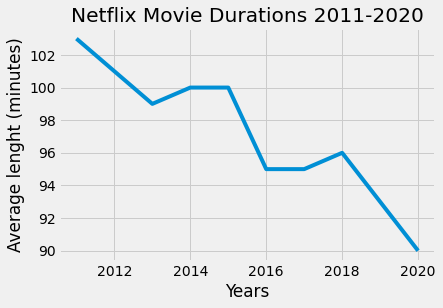

In [25]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(durations_df['years'], durations_df['durations'])

# Create a title and labels
plt.title("Netflix Movie Durations 2011-2020")
plt.xlabel("Years")
plt.ylabel('Average lenght (minutes)')

# Show the plot
plt.show()

<p>Well, it looks like there is something to the idea that movie lengths have decreased over the past ten years! But equipped only with our friend's aggregations, we're limited in the further explorations we can perform. There are a few questions about this trend that we are currently unable to answer, including:</p>
<ol>
<li>What does this trend look like over a longer period of time?</li>
<li>Is this explainable by something like the genre of entertainment?</li>
</ol>
<p>Upon asking our friend for the original CSV he used to perform his analyses, he gladly oblige and send it. We now have access to the CSV file, available at this directory <code>"netflix_data.csv"</code>. Let's create another DataFrame, this time with all of the data. </p>


##### Loading the complete csv file and exploring the dataset

In [26]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv('https://github.com/Gbofrc/Netflix-EDA---Titles-Duration/raw/main/netflix_data.csv')

# Print the first five rows of the DataFrame
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [27]:
# How many rows and columns are in this DataFrame?
netflix_df.shape

(7787, 11)

We then found that our dataset has 7787 rows and 11 columns. Each row is a observation of a title from the Netflix catalog.

In [28]:
# What categories is the dataset divided into?
netflix_df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

The dataset is divided into two main categories: 5377 movies and 2410 TV shows

In [29]:
# How many genres is the dataset divided into?
netflix_df['genre'].value_counts().head()

Dramas              1384
Comedies            1074
Documentaries        751
Action               721
International TV     690
Name: genre, dtype: int64

Each observation is classified into one of the following genres: Drama, Comedy, Documentary, Action and Internacional Tv

In [30]:
# We also count how many titles were released each year.
netflix_df['release_year'].value_counts()

2018    1121
2017    1012
2019     996
2016     882
2020     868
        ... 
1959       1
1966       1
1925       1
1964       1
1947       1
Name: release_year, Length: 73, dtype: int64

<BarContainer object of 73 artists>

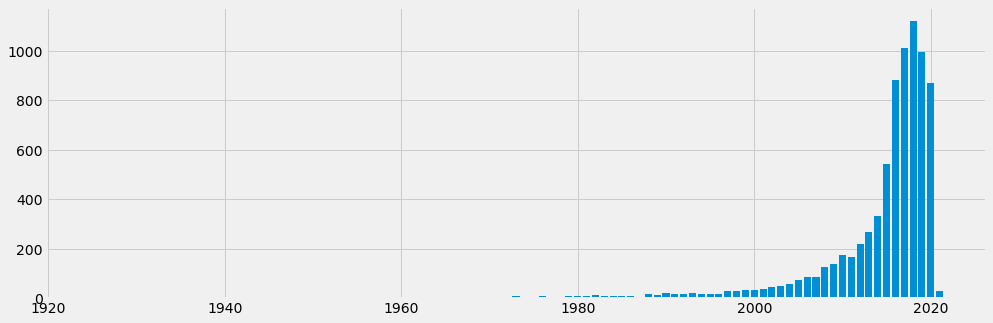

In [31]:
# Extracting values from value_counts to be able to generate a plot of them
values = netflix_df['release_year'].value_counts(dropna=False).keys().tolist()
counts = netflix_df['release_year'].value_counts(dropna=False).tolist()
fig2 = fig = plt.figure(figsize=(15,5))
plt.bar(values,counts)

We can see that the number of releases increased over time, with the largest increase occurring after 2015.

In [32]:
# This count shows us how many releases were made by each country.
netflix_df['country'].value_counts().head()

United States     2883
India              956
United Kingdom     577
Canada             259
Japan              237
Name: country, dtype: int64

In this count, we can see that the number of releases whose country of origin is the USA is almost triple that of the second country, India

In [33]:
# Performing a summary statistics with the duration variable
netflix_df['duration'].describe()

count    7787.000000
mean       69.122769
std        50.950743
min         1.000000
25%         2.000000
50%        88.000000
75%       106.000000
max       312.000000
Name: duration, dtype: float64

Of the 7787 observations, we have an average of 69 minutes (1h09), the minimum value is 1 minute while the maximum value is 312 minutes (5h12). The standard deviation is 50, which confirms a large variability between the values of the variable

##### Viewing the full dataset

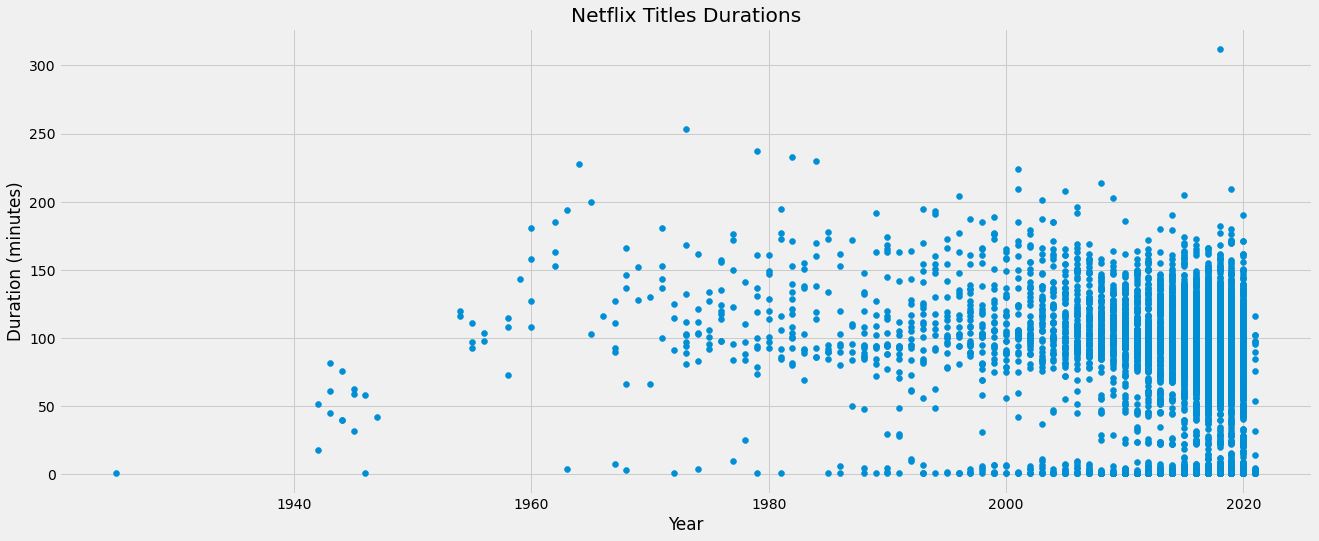

In [34]:
fig = plt.figure(figsize=(20,8))

# Draw a line plot of release_years and durations
plt.scatter(netflix_df['release_year'], netflix_df['duration'])

# Create a title and labels
plt.title("Netflix Titles Durations")
plt.xlabel("Year")
plt.ylabel('Duration (minutes)')

# Show the plot
plt.show()

From the scatter plot, we can see that there is no distinct correlation line between the two variables. Each year of release, we have observations of several different durations.

##### Filtering and starting to analyze only the movies 

In [35]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df['type']=='Movie']

# Select only the columns of interest
netflix_movies_only_col_subset = netflix_df_movies_only[['title', 'country', 'genre', 'release_year', 'duration']]

# Print the first five rows of the new DataFrame
netflix_movies_only_col_subset.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


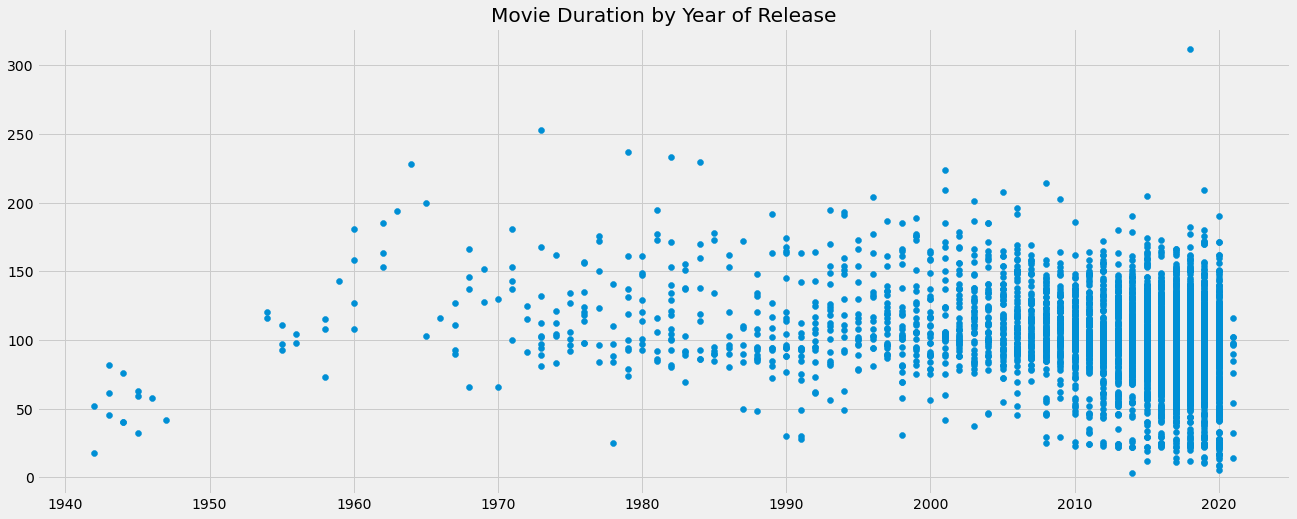

In [36]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(20,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_only_col_subset['release_year'], netflix_movies_only_col_subset['duration'])

# Create a title
plt.title('Movie Duration by Year of Release')

# Show the plot
plt.show()

##### Digging deeper
<p>This is already much more informative than the simple plot we created when our friend first gave us some data. We can also see that, while newer movies are overrepresented on the platform, many short movies have been released in the past two decades.</p>
<p>Upon further inspection, something else is going on. Some of these films are under an hour long! Let's filter our DataFrame for movies with a <code>duration</code> under 60 minutes and look at the genres. This might give us some insight into what is dragging down the average.</p>

In [37]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_only_col_subset
for lab, row in netflix_movies_only_col_subset.iterrows():
    if row['genre'] == "Children":
        colors.append("red")
    elif row['genre'] == "Documentaries":
        colors.append("blue")
    elif row['genre'] == "Stand-Up":
        colors.append("green")
    else:
        colors.append("black")
        
# Inspect the first 10 values in your list        
colors[0:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'blue']

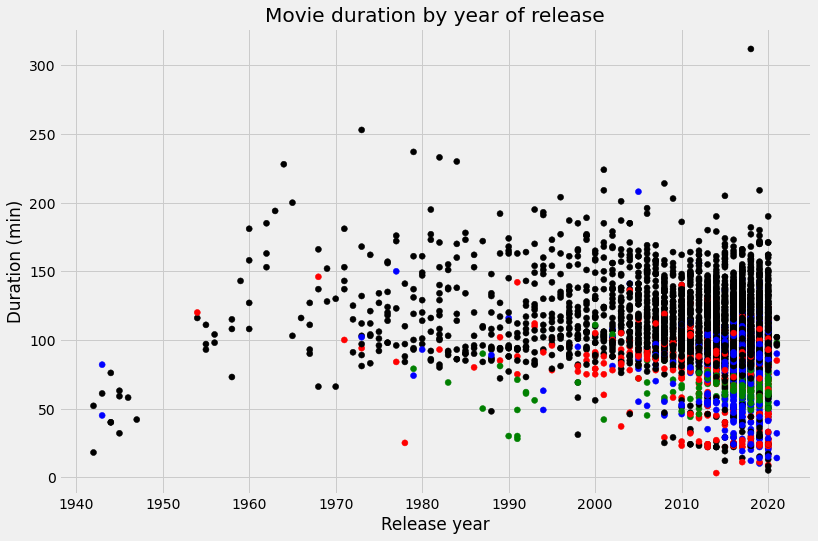

In [38]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_only_col_subset['release_year'], netflix_movies_only_col_subset['duration'], color=colors)

# Create a title and axis labels
plt.title('Movie duration by year of release')
plt.xlabel('Release year')
plt.ylabel('Duration (min)')

# Show the plot
plt.show()

##### What´s next?

<p>Well, as we suspected, non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot. But we can't know for certain until we perform additional analyses. </p>

Are we certain that movies are getting shorter?
Answer: Maybe